**Descripción del Dataset**
 
 Este dataset contiene información sobre 5000 canciones populares. Cada fila representa una canción y sus características musicales, así como datos del artista, álbum y popularidad.

 Se predice el promedio de calificacion de cada canción, con (avg_rat) que es el promedio de rating de las canciones.

In [ ]:
#importar librerias
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [15]:
#limpieza del dataset
df = pd.read_csv("Top5000.csv")

print(df.info())
print(df.columns)

#seleccionar columnas
df = df[[
    "album",
    "ars_name",
    "gens",
    "rel_date",
    "avg_rat",
    "num_rat",
    "num_revs",
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "liveness",
    "loudness",
    "speechiness",
    "tempo",
    "valence",
    "duration_ms"
]]

#eliminar filas con datos nulos
df = df.dropna()

#pasar 'rel_date' a año (extraer el año)
df['rel_year'] = pd.to_datetime(df['rel_date'], errors='coerce').dt.year
df = df.drop(columns=['rel_date'])
df = df.dropna()  #eliminar filas con fechas no convertidas

#reparar columnas nums xon coma
cols_numericas_con_coma = ['num_rat', 'num_revs']

for col in cols_numericas_con_coma:
    #convertir a str para que str.replace funcione
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

print(df.dtypes)

# predecir 'avg_rat' (rating promedio) con las demás numéricas
features = [
    "num_rat",
    "num_revs",
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "liveness",
    "loudness",
    "speechiness",
    "tempo",
    "valence",
    "duration_ms",
    "rel_year"
]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4402 entries, 0 to 4401
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4402 non-null   int64  
 1   ars_name          4402 non-null   object 
 2   rel_date          4402 non-null   object 
 3   gens              4402 non-null   object 
 4   descs             4304 non-null   object 
 5   avg_rat           4402 non-null   float64
 6   num_rat           4402 non-null   object 
 7   num_revs          4402 non-null   int64  
 8   album             4402 non-null   object 
 9   acousticness      4402 non-null   float64
 10  danceability      4402 non-null   float64
 11  energy            4402 non-null   float64
 12  instrumentalness  4402 non-null   float64
 13  liveness          4402 non-null   float64
 14  loudness          4402 non-null   float64
 15  speechiness       4402 non-null   float64
 16  tempo             4402 non-null   float64


C:\Users\IPF-2025\AppData\Local\Temp\ipykernel_5784\3199645451.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['rel_year'] = pd.to_datetime(df['rel_date'], errors='coerce').dt.year


album                object
ars_name             object
gens                 object
avg_rat             float64
num_rat             float64
num_revs            float64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
duration_ms         float64
rel_year            float64
dtype: object


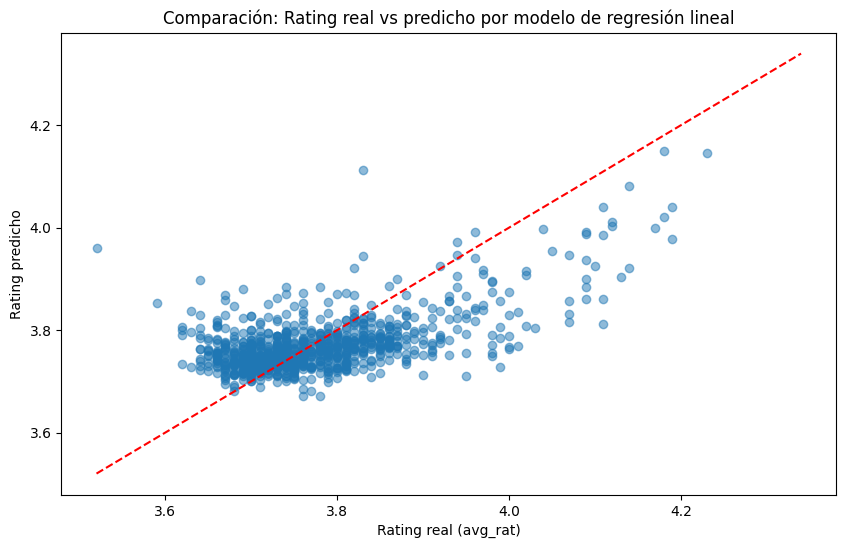

In [ ]:

X = df[features] # variables predictora
y = df["avg_rat"] # variable objetivo

# dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#crear y entrenar modelo 
modelo = LinearRegression()
modelo.fit(X_train, y_train)

#predicciones
y_pred = modelo.predict(X_test)

#comparar valores reales vs predichos
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Rating real (avg_rat)")
plt.ylabel("Rating predicho")
plt.title(" Rating real vs predicho por modelo de regresión lineal")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  #linea diagonal
plt.show()